# Diabetes prediction

The Diabetes prediction dataset is a collection of medical and demographic data from patients, along with their diabetes status (positive or negative). The data includes features such as age, gender, body mass index (BMI), hypertension, heart disease, smoking history, HbA1c level, and blood glucose level. This dataset can be used to build machine learning models to predict diabetes in patients based on their medical history and demographic information. This can be useful for healthcare professionals in identifying patients who may be at risk of developing diabetes and in developing personalized treatment plans. Additionally, the dataset can be used by researchers to explore the relationships between various medical and demographic factors and the likelihood of developing diabetes.

In [ ]:
!pip install imblearn
!pip install mlxtend

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.6/235.6 kB 31.7 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.0.1 -> 23.3.2
[notice] To update, run: pip install --upgrade pip
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 81.3 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.0.1 -> 23.3.2
[notice] To update, run: pip install --upgrade pip


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split,  learning_curve, validation_curve, cross_val_score, GridSearchCV, RandomizedSearchCV, cross_validate
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.metrics import f1_score, recall_score, precision_score, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import StratifiedKFold

from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler, TomekLinks
from imblearn.pipeline import Pipeline as IMBPipeline

from mlxtend.feature_selection import SequentialFeatureSelector as SFS


In [ ]:
df=pd.read_csv('data/diabetes_prediction_dataset.csv')

## Visualizing data

In [ ]:
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [ ]:
class_0_df = df[df['diabetes'] == 0]
class_1_df = df[df['diabetes'] == 1]

We visualize the distribution of the features to get a better idea of the data that we are dealing with.

Here we have the distribution for the features with numerical values.

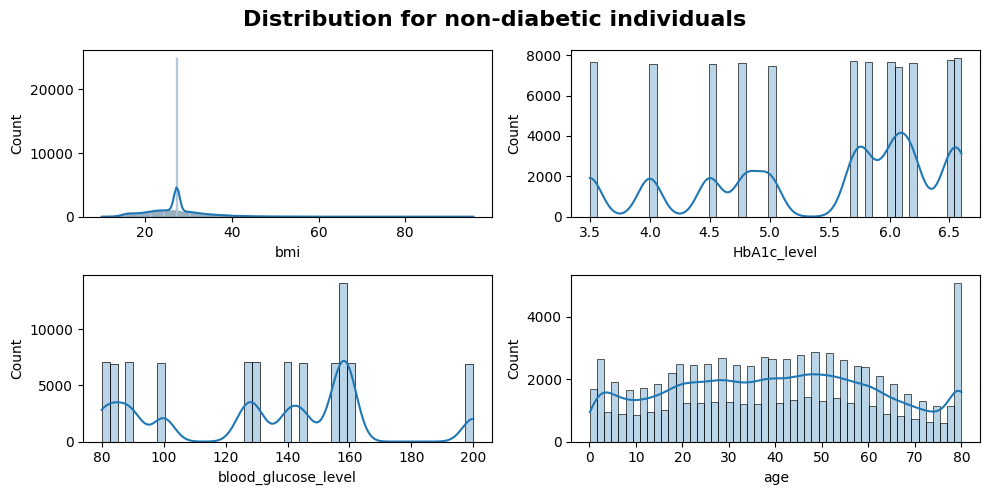

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(10, 5))

sns.histplot(data=class_0_df['bmi'], kde=True, alpha=0.3, ax=axes[0, 0])
sns.histplot(data=class_0_df['HbA1c_level'], kde=True, alpha=0.3, ax=axes[0, 1])
sns.histplot(data=class_0_df['blood_glucose_level'], kde=True, alpha=0.3, ax=axes[1, 0])
sns.histplot(data=class_0_df['age'], kde=True, alpha=0.3, ax=axes[1, 1])

plt.suptitle('Distribution for non-diabetic individuals', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

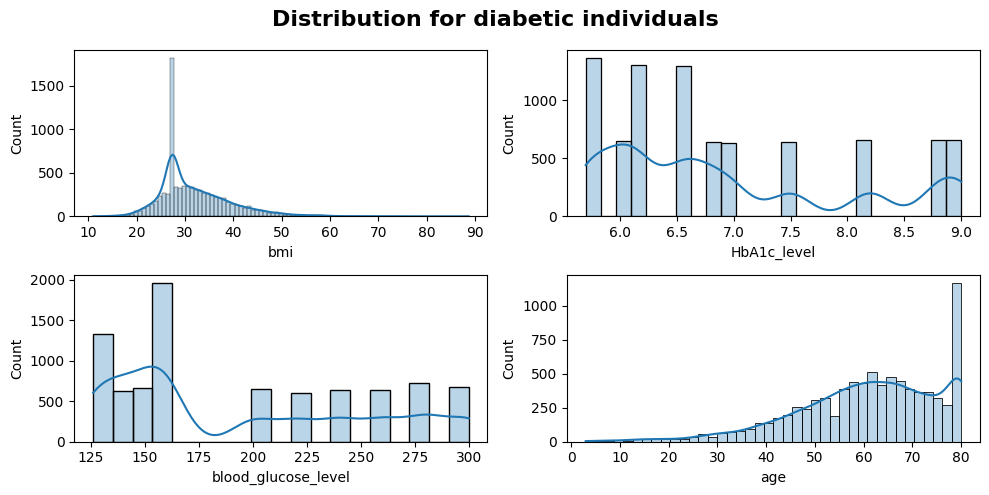

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(10, 5))

sns.histplot(data=class_1_df['bmi'], kde=True, alpha=0.3, ax=axes[0, 0])
sns.histplot(data=class_1_df['HbA1c_level'], kde=True, alpha=0.3, ax=axes[0, 1])
sns.histplot(data=class_1_df['blood_glucose_level'], kde=True, alpha=0.3, ax=axes[1, 0])
sns.histplot(data=class_1_df['age'], kde=True, alpha=0.3, ax=axes[1, 1])

plt.suptitle('Distribution for diabetic individuals', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

And now we take a look at the other distributions

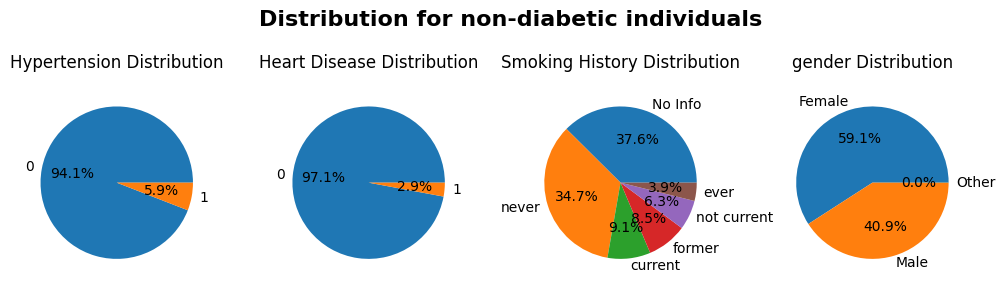

In [ ]:
hypertension_0 = class_0_df['hypertension'].value_counts()
heart_disease_0 = class_0_df['heart_disease'].value_counts()
smoking_history_0 = class_0_df['smoking_history'].value_counts()
gender_0 = class_0_df['gender'].value_counts()

fig, axes = plt.subplots(1, 4, figsize=(10, 3))

axes[0].pie(hypertension_0, labels=hypertension_0.index, autopct='%1.1f%%')
axes[0].set_title('Hypertension Distribution')
axes[0].axis('equal')

axes[1].pie(heart_disease_0, labels=heart_disease_0.index, autopct='%1.1f%%')
axes[1].set_title('Heart Disease Distribution')
axes[1].axis('equal')

axes[2].pie(smoking_history_0, labels=smoking_history_0.index, autopct='%1.1f%%')
axes[2].set_title('Smoking History Distribution')
axes[2].axis('equal')

axes[3].pie(gender_0, labels=gender_0.index, autopct='%1.1f%%')
axes[3].set_title('gender Distribution')
axes[3].axis('equal')

plt.suptitle('Distribution for non-diabetic individuals', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

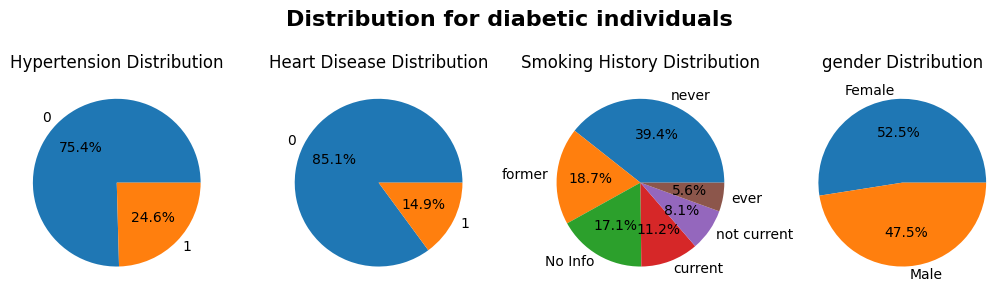

In [ ]:
hypertension_1 = class_1_df['hypertension'].value_counts()
heart_disease_1 = class_1_df['heart_disease'].value_counts()
smoking_history_1 = class_1_df['smoking_history'].value_counts()
gender_1 = class_1_df['gender'].value_counts()

fig, axes = plt.subplots(1, 4, figsize=(10, 3))

axes[0].pie(hypertension_1, labels=hypertension_1.index, autopct='%1.1f%%')
axes[0].set_title('Hypertension Distribution')
axes[0].axis('equal')

axes[1].pie(heart_disease_1, labels=heart_disease_1.index, autopct='%1.1f%%')
axes[1].set_title('Heart Disease Distribution')
axes[1].axis('equal')

axes[2].pie(smoking_history_1, labels=smoking_history_1.index, autopct='%1.1f%%')
axes[2].set_title('Smoking History Distribution')
axes[2].axis('equal')

axes[3].pie(gender_1, labels=gender_1.index, autopct='%1.1f%%')
axes[3].set_title('gender Distribution')
axes[3].axis('equal')

plt.suptitle('Distribution for diabetic individuals', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

Ultimately we inspect the distribution of the target column

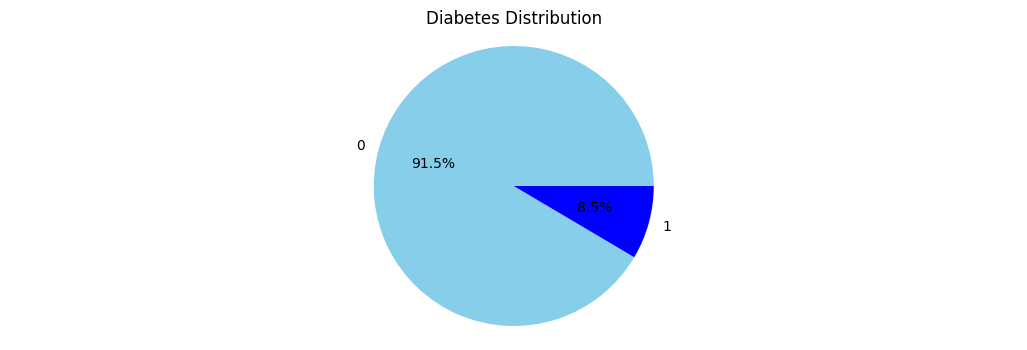

In [ ]:
diabetes_counts = df['diabetes'].value_counts()

plt.figure(figsize=(13, 4))
plt.pie(diabetes_counts, labels=diabetes_counts.index, autopct='%1.1f%%', colors=['skyblue', 'blue'])
plt.title('Diabetes Distribution')
plt.axis('equal') 

plt.show()

In [ ]:
df.shape

(100000, 9)

In [ ]:
df.isnull().sum(axis=0)

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

## Data Transformation

We check for duplicates

In [ ]:
df.duplicated().sum()

3854

In [ ]:
df=df.drop_duplicates()

In [ ]:
df.shape

(96146, 9)

Since the feature "smoking_history" has some rows with value "No Info" i decided to treat those as null values

In [ ]:
print(df.isnull().sum(axis=0))

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64


From the feature distribution i noticed that for the feature 'gender' there weren't many rows with value 'Other', since it might create noise or ambiguity i decided to delete those rows

In [ ]:
df['gender'].unique()

array(['Female', 'Male', 'Other'], dtype=object)

In [ ]:
(df['gender']=='Other').sum()

18

In [ ]:
df.drop(df[df["gender"]=="Other"].index,inplace=True)
df.reset_index(drop=True,inplace=True)

/shared-libs/python3.9/py/lib/python3.9/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [ ]:
(df['gender']=='Other').sum()

0

In [ ]:
df.shape

(96128, 9)

In [ ]:
df['smoking_history'] = df['smoking_history'].replace('No Info', np.nan)

/tmp/ipykernel_44/1952638027.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['smoking_history'] = df['smoking_history'].replace('No Info', np.nan)


Now, we deal with the missing values, categorical data and we implement scaling though column transformation

In [ ]:
 sh_pip=Pipeline(
    [
    ('si', SimpleImputer(strategy='most_frequent')),
    ('ohe', OneHotEncoder(categories='auto')),
    ]
)

In [ ]:
transformation=ColumnTransformer(transformers=[
        ('sh_pip', sh_pip, ['smoking_history']),
        ('ohe', OneHotEncoder(categories='auto'),['gender']),
        ('min_max', MinMaxScaler(),['age'] ),
        ('std', StandardScaler(),['bmi','HbA1c_level', 'blood_glucose_level'] ),
        
    ],
    verbose_feature_names_out=False,
    remainder='passthrough',
)

In [ ]:
transformed_data = transformation.fit_transform(df)
new_df = pd.DataFrame(transformed_data, columns=transformation.get_feature_names_out())
new_df

,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current,gender_Female,gender_Male,age,bmi,HbA1c_level,blood_glucose_level,hypertension,heart_disease,diabetes
0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.000000,-0.314941,0.994547,0.043558,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.674675,-0.000214,0.994547,-1.423041,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.349349,-0.000214,0.155949,0.483538,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.449449,-0.572042,-0.496294,0.410208,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.949950,-1.061124,-0.682649,0.410208,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96123,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.449449,-0.402119,-0.682649,0.165775,0.0,0.0,0.0
96124,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.024024,-1.470417,0.901370,-0.934175,0.0,0.0,0.0
96125,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.824825,0.075143,0.155949,0.410208,0.0,0.0,0.0
96126,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.299299,1.196634,-1.428070,-0.934175,0.0,0.0,0.0


In [ ]:
new_df.isnull().sum(axis=0)

smoking_history_current        0
smoking_history_ever           0
smoking_history_former         0
smoking_history_never          0
smoking_history_not current    0
gender_Female                  0
gender_Male                    0
age                            0
bmi                            0
HbA1c_level                    0
blood_glucose_level            0
hypertension                   0
heart_disease                  0
diabetes                       0
dtype: int64

## Model selection

In [ ]:
X = new_df.drop(['diabetes'], axis=1)
Y = new_df['diabetes']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, stratify=Y,  random_state=30, shuffle=True)

here i define different list and create different combinations and compare their f1 sores

In [ ]:
models = [
    ('Logistic Regression', LogisticRegression()),
    ('KNN', KNeighborsClassifier()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest', RandomForestClassifier(), ),
]

samplers = [
    ('None', None),
    ('SMOTE', SMOTE(sampling_strategy='auto', random_state=42)),
    ('RandomOverSampler', RandomOverSampler(sampling_strategy='auto', random_state=42)),
]

reductions = [
    ('None', None),
    ('PCA', PCA()),
    ('LDA', LDA()),
]

In [ ]:
results = []

for model_name, model in models:
    for sampler_name, sampler in samplers:
        for reduction_name, reduction in reductions:
            if sampler_name == 'None':
                sampler = None 

            pipeline = IMBPipeline([
                ('sampler', sampler),
                ('reduction', reduction),
                ('model', model)
            ])

            pipeline.fit(X_train, y_train)
            y_pred = pipeline.predict(X_test)
            f1 = f1_score(y_test, y_pred)

            result_info = {
                'Model': model_name,
                'Sampler': sampler_name,
                'Reduction': reduction_name,
                'F1 Score': f1
            }

            results.append(result_info)

# Sort the results based on F1 score in ascending order
sorted_results = sorted(results, key=lambda x: x['F1 Score'])

# Print the sorted results
for result_info in sorted_results:
    print(f"Model: {result_info['Model']}, Sampler: {result_info['Sampler']}, Reduction: {result_info['Reduction']}, F1 Score: {result_info['F1 Score']}")

Model: Random Forest, Sampler: SMOTE, Reduction: LDA, F1 Score: 0.48715313463514903
Model: Decision Tree, Sampler: SMOTE, Reduction: LDA, F1 Score: 0.4878216123499143
Model: KNN, Sampler: SMOTE, Reduction: LDA, F1 Score: 0.5385539274561614
Model: Logistic Regression, Sampler: SMOTE, Reduction: None, F1 Score: 0.5763059940957515
Model: Logistic Regression, Sampler: SMOTE, Reduction: PCA, F1 Score: 0.5763059940957515
Model: Logistic Regression, Sampler: RandomOverSampler, Reduction: None, F1 Score: 0.5768145678379072
Model: Logistic Regression, Sampler: RandomOverSampler, Reduction: PCA, F1 Score: 0.576888546877004
Model: KNN, Sampler: RandomOverSampler, Reduction: LDA, F1 Score: 0.5784054133568698
Model: Logistic Regression, Sampler: RandomOverSampler, Reduction: LDA, F1 Score: 0.5802073998207656
Model: Logistic Regression, Sampler: SMOTE, Reduction: LDA, F1 Score: 0.5803971812940423
Model: Random Forest, Sampler: None, Reduction: LDA, F1 Score: 0.6061556557537737
Model: Decision Tree, 

### Random Forest Classifier

The best result is:  Model: Random Forest, Sampler: None, Reduction: None, F1 Score: 0.7927107061503417

In [ ]:
best_model=IMBPipeline([
    ('model', RandomForestClassifier()),
])

In [ ]:
#X_resampled, y_resampled = best_model.named_steps['SMOTE'].fit_resample(X_train, y_train)

In [ ]:
best_model.fit(X_train, y_train)

Pipeline(steps=[('model', RandomForestClassifier())])

In [ ]:
#(y_resampled==0).sum(), (y_resampled==1).sum()

In [ ]:
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cross_val_results = cross_val_score(model, X_train, y_train, cv=stratified_kfold, scoring='f1')

print("Cross-Validation Results:")
print(cross_val_results)
print(f"Mean f1: {np.mean(cross_val_results)}")

Cross-Validation Results:
[0.78635015 0.79727759 0.80424301 0.78162055 0.79293425]
Mean f1: 0.792485109678388


In [ ]:
train_sizes, train_scores, test_scores = learning_curve(estimator=best_model,
                                                       X=X_train,
                                                       y=y_train,
                                                       train_sizes= [0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
                                                       cv = 5,
                                                       n_jobs = -1,
                                                       scoring = 'f1',
                                                       shuffle = False)

In [ ]:
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

(0.5, 1.1)

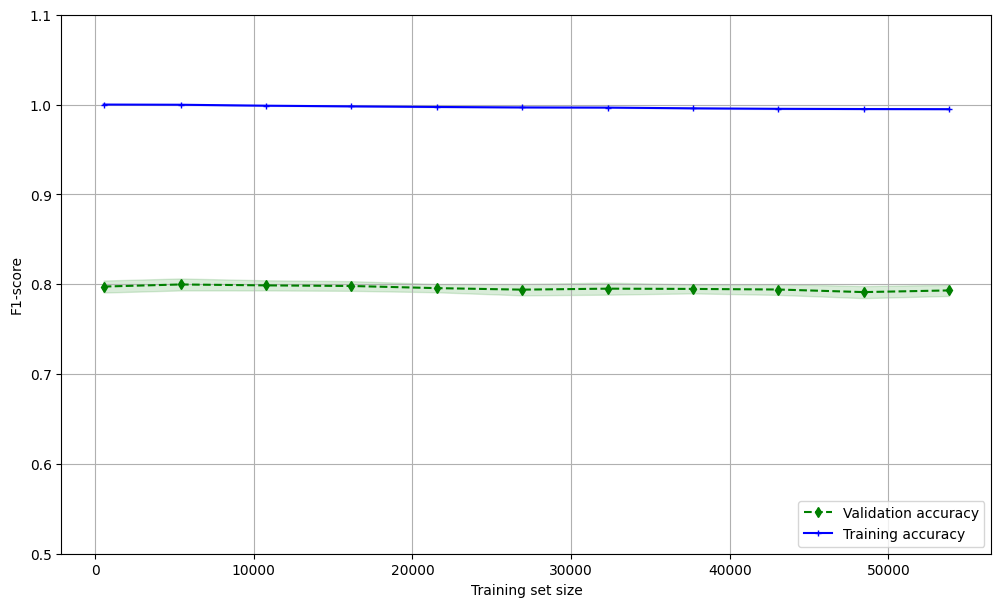

In [ ]:
fig=plt.figure(figsize=(12,7))
ax = fig.add_subplot()

ax.plot(train_sizes, test_mean,
         color='green', linestyle='--',
         marker='d', markersize=5,
         label='Validation accuracy')

ax.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')

ax.plot(train_sizes, train_mean,
         color='blue', marker='+',
         markersize=5, label='Training accuracy')

ax.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')

ax.set_xlabel('Training set size')
ax.set_ylabel('F1-score')
ax.legend(loc='lower right')

ax.grid()
ax.set_ylim([0.50, 1.10])

The f1 score for training and validation are both high but the validation f1 score is lower than the training one, suggesting that there might be an overfit of the training data and that the model doesn't work as well on unseen data. 

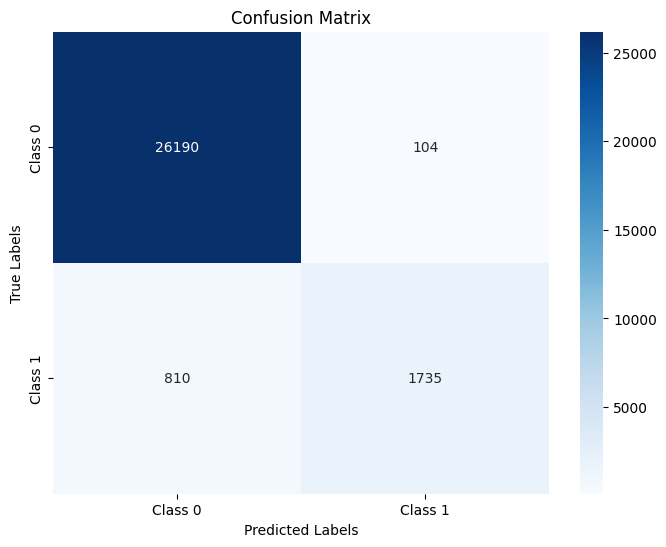

In [ ]:
y_pred=best_model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
accuracy_score(y_test, y_pred), f1_score(y_test, y_pred), recall_score(y_test, y_pred), precision_score(y_test, y_pred)

(0.9683068067547418, 0.791514598540146, 0.6817288801571709, 0.9434475258292551)

Let's try with the second best model:  Model: Random Forest, Sampler: RandomOverSampler, Reduction: None, F1 Score: 0.7722056948576286

In [ ]:
model2=IMBPipeline([
    ('sampler', RandomOverSampler(sampling_strategy='auto', random_state=42)),
    ('model', RandomForestClassifier())
])

In [ ]:
model2.fit(X_train, y_train)

Pipeline(steps=[('sampler', RandomOverSampler(random_state=42)),
                ('model', RandomForestClassifier())])

In [ ]:
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cross_val_results = cross_val_score(model2, X_train, y_train, cv=stratified_kfold, scoring='f1')

print("Cross-Validation Results:")
print(cross_val_results)
print(f"Mean f1: {np.mean(cross_val_results)}")

Cross-Validation Results:
[0.77149425 0.77777778 0.77738201 0.75979714 0.77869605]
Mean f1: 0.7730294472162305


In [ ]:
train_sizes, train_scores, test_scores = learning_curve(estimator=model2,
                                                       X=X_train,
                                                       y=y_train,
                                                       train_sizes= [0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
                                                       cv = 5,
                                                       n_jobs = -1,
                                                       scoring = 'f1',
                                                       shuffle = False)

In [ ]:
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

(0.5, 1.1)

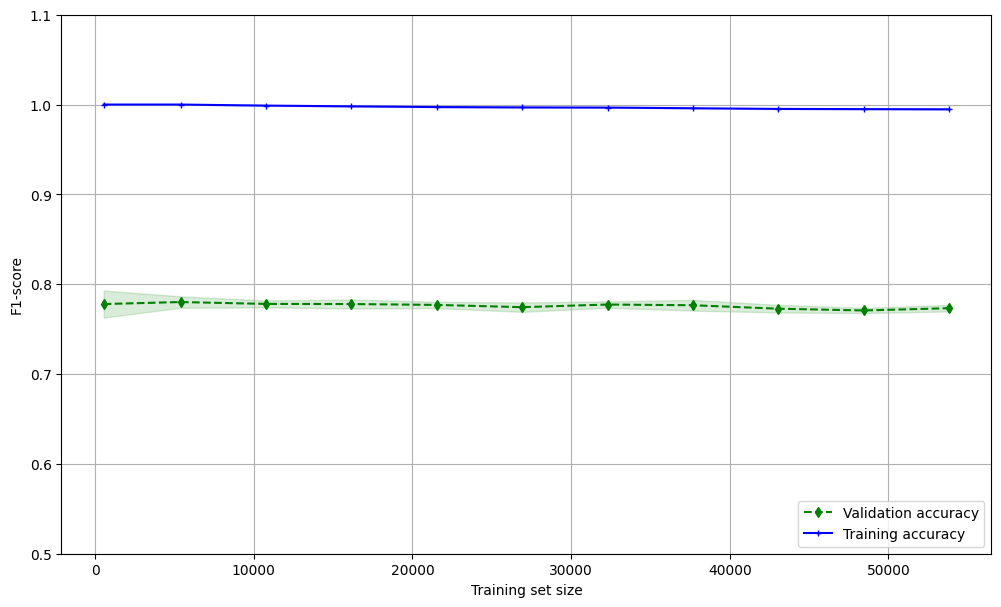

In [ ]:
fig=plt.figure(figsize=(12,7))
ax = fig.add_subplot()

ax.plot(train_sizes, test_mean,
         color='green', linestyle='--',
         marker='d', markersize=5,
         label='Validation accuracy')

ax.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')

ax.plot(train_sizes, train_mean,
         color='blue', marker='+',
         markersize=5, label='Training accuracy')

ax.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')

ax.set_xlabel('Training set size')
ax.set_ylabel('F1-score')
ax.legend(loc='lower right')

ax.grid()
ax.set_ylim([0.50, 1.10])

We got a similiar result as before with a lower f1 score for the validation curve

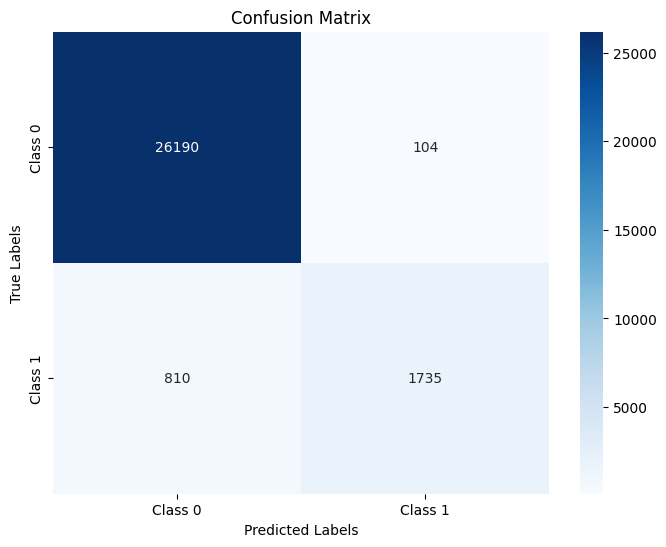

In [ ]:
y_pred=best_model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
accuracy_score(y_test, y_pred), f1_score(y_test, y_pred), recall_score(y_test, y_pred), precision_score(y_test, y_pred)

(0.9683068067547418, 0.791514598540146, 0.6817288801571709, 0.9434475258292551)

### K-Neighbors Classifier

Since random forest seems to be overfitting we are now going to try the best combination for knn (Model: KNN, Sampler: None, Reduction: PCA, F1 Score: 0.7397069085833915) which was the best performing classifier after Random forest.

In [ ]:
model3=IMBPipeline([
    ('reduction', PCA()),
    ('model', KNeighborsClassifier())
])

In [ ]:
model3.fit(X_train, y_train)

Pipeline(steps=[('reduction', PCA()), ('model', KNeighborsClassifier())])

In [ ]:
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cross_val_results = cross_val_score(model3, X_train, y_train, cv=stratified_kfold, scoring='f1')

print("Cross-Validation Results:")
print(cross_val_results)
print(f"Mean f1: {np.mean(cross_val_results)}")

Cross-Validation Results:
[0.74395161 0.76054956 0.75464321 0.73353293 0.74574575]
Mean f1: 0.7476846114854793


In [ ]:
train_sizes, train_scores, test_scores = learning_curve(estimator=model3,
                                                       X=X_train,
                                                       y=y_train,
                                                       train_sizes= [0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
                                                       cv = 5,
                                                       n_jobs = -1,
                                                       scoring = 'f1',
                                                       shuffle = False)

In [ ]:
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

(0.4, 0.9)

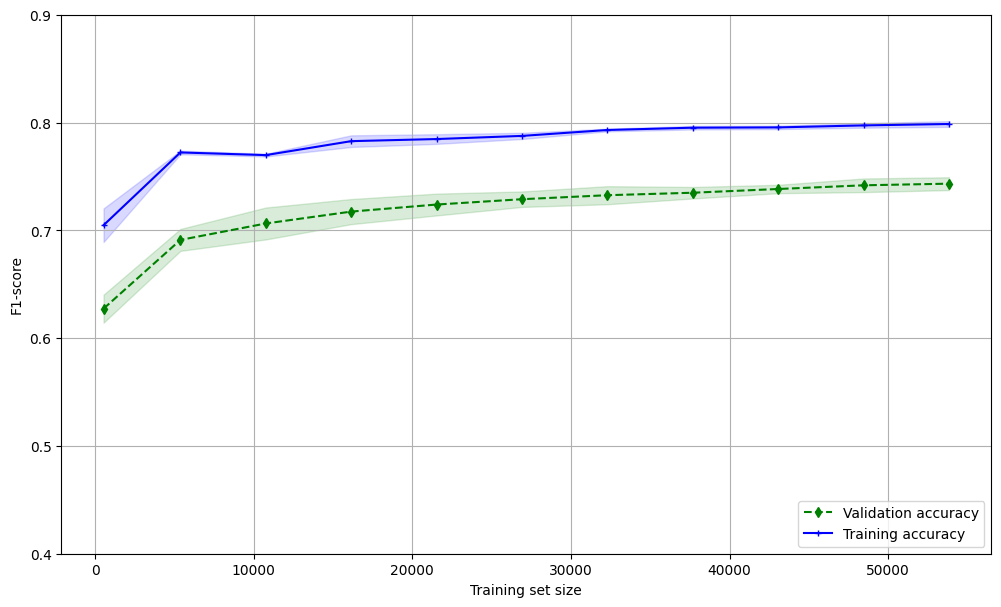

In [ ]:
fig=plt.figure(figsize=(12,7))
ax = fig.add_subplot()

ax.plot(train_sizes, test_mean,
         color='green', linestyle='--',
         marker='d', markersize=5,
         label='Validation accuracy')

ax.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')

ax.plot(train_sizes, train_mean,
         color='blue', marker='+',
         markersize=5, label='Training accuracy')

ax.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')

ax.set_xlabel('Training set size')
ax.set_ylabel('F1-score')
ax.legend(loc='lower right')

ax.grid()
ax.set_ylim([0.40, 0.9])

There seems to be less overfitting for this combination but we will try to get a better result

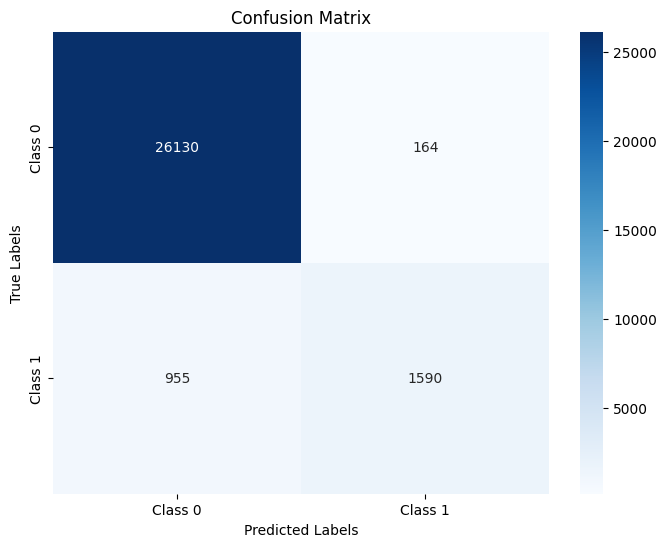

In [ ]:
y_pred=model3.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
accuracy_score(y_test, y_pred), f1_score(y_test, y_pred), recall_score(y_test, y_pred), precision_score(y_test, y_pred)

(0.961198377197545, 0.7397069085833915, 0.6247544204322201, 0.9064994298745724)

### Logistic Regression

Now we are going to try this pipeline: Model: Logistic Regression, Sampler: None, Reduction: PCA. Logistic regression is the third best performing classifier (F1 Score: 0.7290483761071997)

In [ ]:
model4=Pipeline([
    ('reduction', PCA()),
    ('model', LogisticRegression())
])

In [ ]:
model4.fit(X_train, y_train)

Pipeline(steps=[('reduction', PCA()), ('model', LogisticRegression())])

In [ ]:
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cross_val_results = cross_val_score(model4, X_train, y_train, cv=stratified_kfold, scoring='f1')

print("Cross-Validation Results:")
print(cross_val_results)
print(f"Mean f1: {np.mean(cross_val_results)}")

Cross-Validation Results:
[0.72150644 0.73063809 0.73781676 0.72506083 0.72834068]
Mean f1: 0.7286725598962657


In [ ]:
train_sizes, train_scores, test_scores = learning_curve(estimator=model4,
                                                       X=X_train,
                                                       y=y_train,
                                                       train_sizes= [0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
                                                       cv = 5,
                                                       n_jobs = -1,
                                                       scoring = 'f1',
                                                       shuffle = False)

In [ ]:
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

(0.4, 0.9)

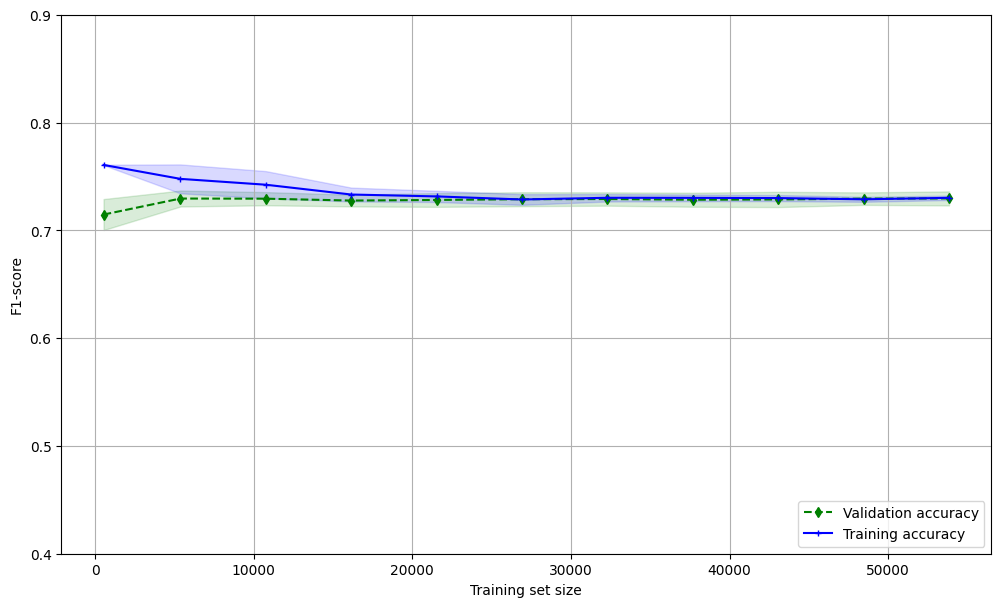

In [ ]:
fig=plt.figure(figsize=(12,7))
ax = fig.add_subplot()

ax.plot(train_sizes, test_mean,
         color='green', linestyle='--',
         marker='d', markersize=5,
         label='Validation accuracy')

ax.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')

ax.plot(train_sizes, train_mean,
         color='blue', marker='+',
         markersize=5, label='Training accuracy')

ax.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')

ax.set_xlabel('Training set size')
ax.set_ylabel('F1-score')
ax.legend(loc='lower right')

ax.grid()
ax.set_ylim([0.40, 0.9])

Training and validation curve are closer to each other if we compare them to the previous models, so this is the best result we got so far

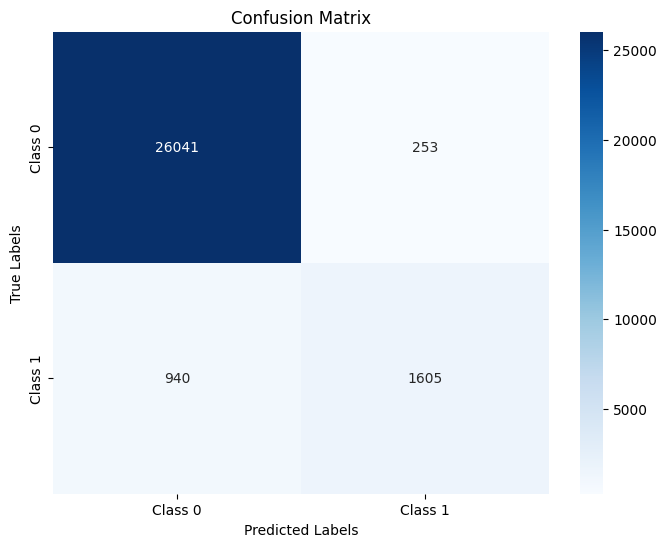

In [ ]:
y_pred=model4.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
accuracy_score(y_test, y_pred), f1_score(y_test, y_pred), recall_score(y_test, y_pred), precision_score(y_test, y_pred)

(0.9586324075037276, 0.7290483761071997, 0.630648330058939, 0.8638320775026911)

Now we try some hyperparameter tuning to see if we can improve the accuracy

In [ ]:
param_grid_l1 = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1'],
    'solver': ['liblinear'],
    'max_iter': [100, 500, 1000],
}

grid_search_l1 = GridSearchCV(LogisticRegression(), param_grid_l1, cv=8, scoring='f1')
grid_search_l1.fit(X_train, y_train)

best_params_l1 = grid_search_l1.best_params_
best_estimator_l1 = grid_search_l1.best_estimator_

y_pred_l1 = best_estimator_l1.predict(X_test)
f1_score_best_l1 = f1_score(y_test, y_pred_l1)

print(f'Best Parameters for l1 penalty: {best_params_l1}')
print(f'F1-Score with Best Parameters for l1 penalty: {f1_score_best_l1}')


Best Parameters for l1 penalty: {'C': 0.1, 'max_iter': 500, 'penalty': 'l1', 'solver': 'liblinear'}
F1-Score with Best Parameters for l1 penalty: 0.7295511506037823


In [ ]:
# Hyperparameter tuning for 'l2' penalty
param_grid_l2 = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l2'],
    'solver': ['lbfgs'],
    'max_iter': [100, 500, 1000],
}

grid_search_l2 = GridSearchCV(LogisticRegression(), param_grid_l2, cv=8, scoring='f1')
grid_search_l2.fit(X_train, y_train)

best_params_l2 = grid_search_l2.best_params_
best_estimator_l2 = grid_search_l2.best_estimator_

y_pred_l2 = best_estimator_l2.predict(X_test)
f1_score_best_l2 = f1_score(y_test, y_pred_l2)

print(f'Best Parameters for l2 penalty: {best_params_l2}')
print(f'F1-Score with Best Parameters for l2 penalty: {f1_score_best_l2}')


Best Parameters for l2 penalty: {'C': 0.1, 'max_iter': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
F1-Score with Best Parameters for l2 penalty: 0.7281863864778437


Both hyperparameter tunings give lower f1 scores than the original one (0.7290483761071997) which might mean that the selected hyperparameters are not improving generalization to the test set.

In [ ]:
y_pred_2=grid_search.best_estimator_.predict(X_test)

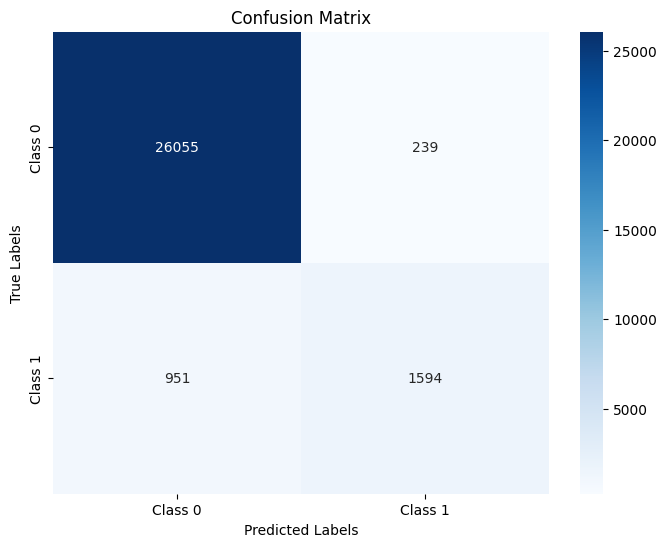

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred_2)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
accuracy_score(y_test, y_pred), f1_score(y_test, y_pred), recall_score(y_test, y_pred), precision_score(y_test, y_pred)

(0.9587364333021255,
 0.7281863864778437,
 0.6263261296660118,
 0.8696126568466994)

In [ ]:
range_C = [0.001, 0.01, 0.1, 1, 10, 100]

train_scores, test_scores = validation_curve(
    model4,
    X=X_train,
    y=y_train,
    param_range=range_C,
    param_name='model__C',  # Use 'model__C' instead of 'classifier__C'
    cv=8,
    n_jobs=-1,
    scoring='f1'
)


(0.05, 100)

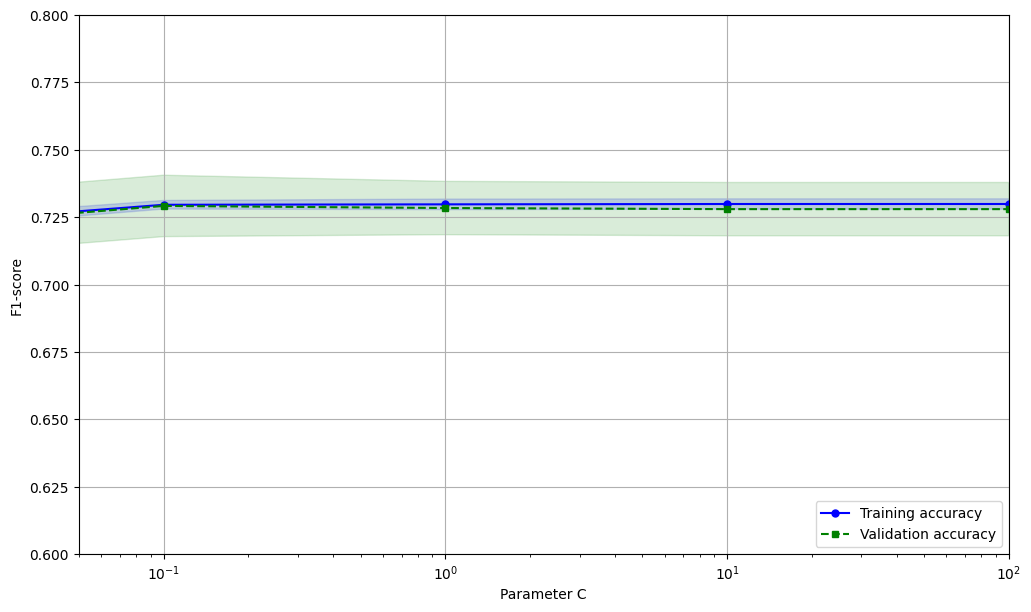

In [ ]:
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

fig=plt.figure(figsize=(12,7))
ax = fig.add_subplot()
ax.plot(range_C, train_mean,
         color='blue', marker='o',
         markersize=5, label='Training accuracy')

ax.fill_between(range_C,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')

ax.plot(range_C, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='Validation accuracy')

ax.fill_between(range_C,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')

ax.grid()
ax.set_xlabel('Parameter C')
ax.set_ylabel('F1-score')
ax.legend(loc='lower right')
ax.set_ylim([0.6, 0.8])
ax.set_xscale('log')
ax.set_xlim([0.05,100])

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=df00cfbb-df62-4584-a655-05b274c41646' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>